In [1]:
# conda activate movie-recommender          # activate environment in terminal         
# jupyter notebook                     # start server + kernel inside my-conda-env
# !pip install plotly

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
chunksize=100000
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Custom date parser function
date_parser = lambda x: pd.to_datetime(x, unit='s')

# ratings
ratings = pd.DataFrame()  # initialize an empty dataframe
for index, chunk in enumerate(pd.read_csv('../samples/random_10th_user_ratings.csv',
                         dtype={'userId': str, 'movieId': str, "rating": float, 'timestamp': int},
                         chunksize=chunksize,
                         parse_dates=['timestamp'],
                         date_parser=date_parser
                         )):
    # Perform operations on the chunk
    # processed_chunk = chunk[chunk['column_name'] > 0]  # Example operation
    ratings = pd.concat([ratings, chunk])
    print(f"Chunk {index} loaded")
print("Ratings dataset loaded")

/var/folders/55/xtgthnr12lz2b2j6l0pqj7zm0459s6/T/ipykernel_2599/3815746469.py:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  for index, chunk in enumerate(pd.read_csv('../samples/random_10th_user_ratings.csv',


Chunk 0 loaded
Chunk 1 loaded
Chunk 2 loaded
Chunk 3 loaded
Chunk 4 loaded
Chunk 5 loaded
Chunk 6 loaded
Chunk 7 loaded
Chunk 8 loaded
Chunk 9 loaded
Chunk 10 loaded
Chunk 11 loaded
Chunk 12 loaded
Chunk 13 loaded
Chunk 14 loaded
Chunk 15 loaded
Chunk 16 loaded
Chunk 17 loaded
Chunk 18 loaded
Chunk 19 loaded
Ratings dataset loaded


In [4]:
print(ratings.head(10))

  userId movieId  rating           timestamp
0      1       2     3.5 2005-04-02 23:53:47
1      1      29     3.5 2005-04-02 23:31:16
2      1      32     3.5 2005-04-02 23:33:39
3      1      47     3.5 2005-04-02 23:32:07
4      1      50     3.5 2005-04-02 23:29:40
5      1     112     3.5 2004-09-10 03:09:00
6      1     151     4.0 2004-09-10 03:08:54
7      1     223     4.0 2005-04-02 23:46:13
8      1     253     4.0 2005-04-02 23:35:40
9      1     260     4.0 2005-04-02 23:33:46


Now the time is fixed, I can use this approach going forward

In [5]:
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982131 entries, 0 to 1982130
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   userId     object        
 1   movieId    object        
 2   rating     float64       
 3   timestamp  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 60.5+ MB
None


Sampled Ratings dataset has 1,982,131 entries. 4 columns considting of 

0   userId     object / string        
1   movieId    object / string        
2   rating     float64       
3   timestamp  datetime64[ns]

Now we will look at the summarty statistics of the dataset

In [6]:
# Set the float format to 2 decimal places
pd.options.display.float_format = '{:.2f}'.format
print(ratings.describe())
# Reset to default float format
pd.reset_option('display.float_format')

          rating                      timestamp
count 1982131.00                        1982131
mean        3.53  2004-12-03 21:52:11.056621312
min         0.50            1995-01-09 11:46:44
25%         3.00     2000-08-18 21:38:59.500000
50%         3.50            2005-01-31 04:14:03
75%         4.00            2008-12-01 01:00:42
max         5.00            2015-03-31 06:11:28
std         1.05                            NaN


We get a summary statisics of the table rating and timestamp columns. For ratings, the mean value is 3.5, the lower quartile 3, and the upper quartile is 4. Lets make a plot of this to explore it more.

I will use the seaborn plot library for this.

First, I will create a histogram to see the distribution of the ratings 

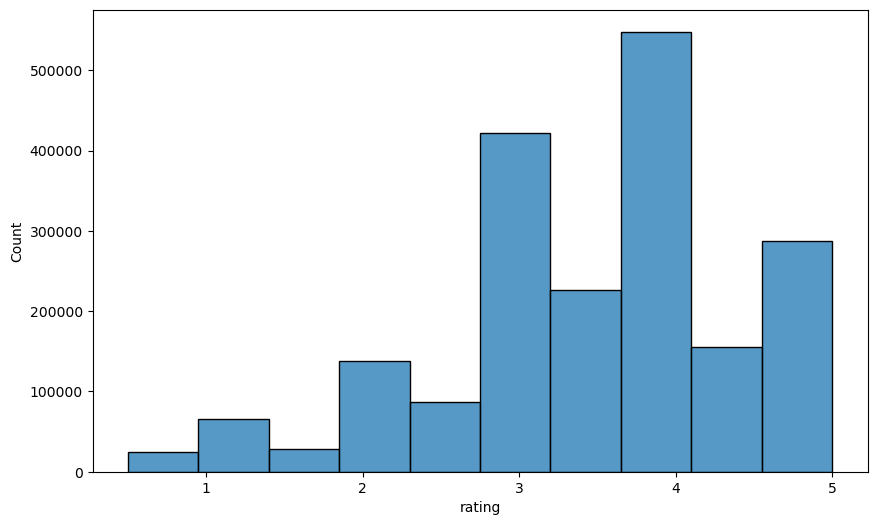

In [7]:
plt.figure(figsize=(10, 6))
# Create a histogram for rating
sns.histplot(data=ratings, x='rating', bins=10)
plt.show()

The histogram could be improved upon, first I would like to see how many unique ratings there are

In [8]:
unique_values = ratings['rating'].unique().tolist()

print(sorted(unique_values))

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


the ratings values can be either a whole or half unit from 0.5 up to 5 

In [9]:
# Create the count table
count_table = ratings['rating'].value_counts().reset_index()
count_table.columns = ['rating', 'count']

total = count_table["count"].sum()
count_table["percentage"] = round((count_table["count"]/total)*100, 0)
count_table = count_table.sort_values(by="rating")
# Print the count table
print(count_table)


   rating   count  percentage
9     0.5   24488         1.0
7     1.0   66088         3.0
8     1.5   28147         1.0
5     2.0  137993         7.0
6     2.5   87323         4.0
1     3.0  421425        21.0
3     3.5  225823        11.0
0     4.0  547921        28.0
4     4.5  155069         8.0
2     5.0  287854        15.0


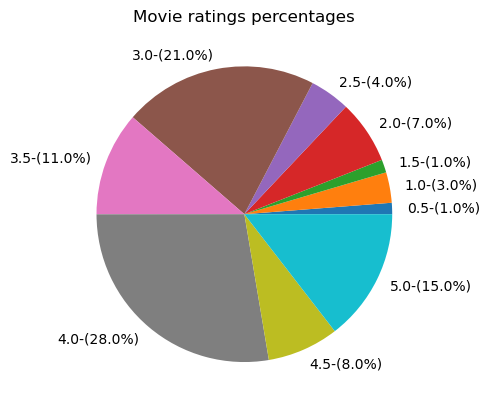

In [10]:
# Choose a Seaborn color palette
# colors = sns.color_palette('pastel')[0:4]
labels = [f"{rating}-({percentage}%)" for rating, percentage in zip(count_table["rating"], count_table["percentage"])]
# Create the pie chart
plt.pie(count_table['count'], labels=labels, 
        # colors=colors, autopct='%.0f%%'
        )
plt.title('Movie ratings percentages')
plt.show()

This looks intesting, we get a complete understanding of the data distribution. We can see that 4, 3 and 5 are the most common ratings.

The .5 incremenets are strange, why are the incremenets so low? Lets see the distribution of increments across time

/var/folders/55/xtgthnr12lz2b2j6l0pqj7zm0459s6/T/ipykernel_2599/1663752065.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incremental_ratings['year'] = incremental_ratings['timestamp'].dt.year
/var/folders/55/xtgthnr12lz2b2j6l0pqj7zm0459s6/T/ipykernel_2599/1663752065.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_incremental_ratings['year'] = non_incremental_ratings['timestamp'].dt.year


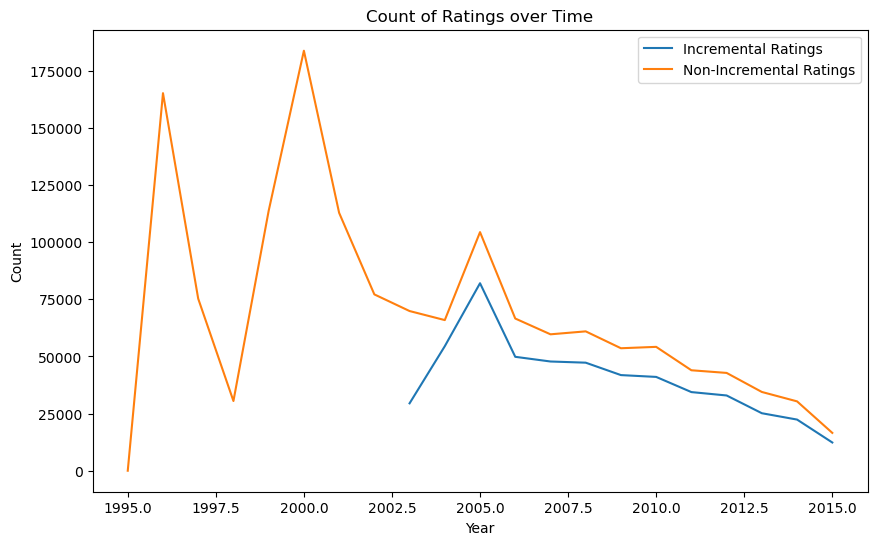

In [11]:
# Create a dataframe for incremental ratings
incremental_ratings = ratings[ratings['rating'].isin([0.5, 1.5, 2.5, 3.5, 4.5])]
incremental_ratings['year'] = incremental_ratings['timestamp'].dt.year
# Create a dataframe for non-incremental ratings
non_incremental_ratings = ratings[ratings['rating'].isin([1, 2, 3, 4, 5])]
non_incremental_ratings['year'] = non_incremental_ratings['timestamp'].dt.year
# Group by year and count the number of ratings for each type
incremental_ratings_count = incremental_ratings.groupby('year')['rating'].count()
non_incremental_ratings_count = non_incremental_ratings.groupby('year')['rating'].count()

# Plot the count of ratings over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=incremental_ratings_count.index, y=incremental_ratings_count.values, label='Incremental Ratings')
sns.lineplot(x=non_incremental_ratings_count.index, y=non_incremental_ratings_count.values, label='Non-Incremental Ratings')
plt.title('Count of Ratings over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()

This shows the incremental ratings start around 2002 and generally reflect the same distibution as the non-incremental ratings.

Based on this evidence it makes sense to remove the incremenetal ratings as these will complicate the analysis.

In [12]:
ratings.info()

ratings = non_incremental_ratings

ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982131 entries, 0 to 1982130
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   userId     object        
 1   movieId    object        
 2   rating     float64       
 3   timestamp  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 60.5+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 1461281 entries, 6 to 1982129
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   userId     1461281 non-null  object        
 1   movieId    1461281 non-null  object        
 2   rating     1461281 non-null  float64       
 3   timestamp  1461281 non-null  datetime64[ns]
 4   year       1461281 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(2)
memory usage: 61.3+ MB


By removing the incremental rating we have removed over 400k ratings

In [13]:
n_unique_users = ratings['userId'].nunique()
 
user_count = ratings.groupby('userId').size().reset_index(name='count')
user_count["percentage"] = (user_count["count"]/total)*100
user_count = user_count.sort_values(by="count", ascending=False)

print("description of unique users ratings")
print(user_count["count"].describe())
print("The top rating provider")
print(user_count.head(10))


description of unique users ratings
count    13849.000000
mean       105.515272
std        152.935021
min          1.000000
25%         28.000000
50%         54.000000
75%        115.000000
max       2532.000000
Name: count, dtype: float64
The top rating provider
       userId  count  percentage
325    103223   2532    0.127741
10742   71975   2223    0.112152
4533      156   2157    0.108822
6620    34856   2107    0.106300
306     10303   1952    0.098480
9949    64843   1931    0.097420
11622   80092   1712    0.086372
7350    41613   1619    0.081680
4542    15718   1489    0.075121
13511   97141   1474    0.074364


In [14]:
plt.hist(user_count["count"], bins=100 )


(array([3.181e+03, 3.560e+03, 1.930e+03, 1.270e+03, 8.040e+02, 5.640e+02,
        4.690e+02, 2.930e+02, 2.610e+02, 2.190e+02, 1.680e+02, 1.550e+02,
        1.290e+02, 9.200e+01, 7.600e+01, 6.500e+01, 7.200e+01, 5.800e+01,
        4.500e+01, 3.700e+01, 4.000e+01, 3.700e+01, 2.900e+01, 2.600e+01,
        2.400e+01, 2.400e+01, 1.700e+01, 1.600e+01, 1.200e+01, 1.400e+01,
        1.400e+01, 2.000e+01, 1.100e+01, 1.400e+01, 9.000e+00, 8.000e+00,
        7.000e+00, 1.100e+01, 5.000e+00, 4.000e+00, 3.000e+00, 6.000e+00,
        5.000e+00, 8.000e+00, 2.000e+00, 5.000e+00, 4.000e+00, 1.000e+00,
        1.000e+00, 3.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 5.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

In [15]:
plt.hist(user_count["count"], bins=25 )
# plt.yscale("log")

(array([9.941e+03, 2.130e+03, 8.030e+02, 3.620e+02, 2.120e+02, 1.320e+02,
        8.100e+01, 6.000e+01, 4.200e+01, 2.700e+01, 2.200e+01, 1.200e+01,
        7.000e+00, 7.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00]),
 array([1.00000e+00, 1.02240e+02, 2.03480e+02, 3.04720e+02, 4.05960e+02,
        5.07200e+02, 6.08440e+02, 7.09680e+02, 8.10920e+02, 9.12160e+02,
        1.01340e+03, 1.11464e+03, 1.21588e+03, 1.31712e+03, 1.41836e+03,
        1.51960e+03, 1.62084e+03, 1.72208e+03, 1.82332e+03, 1.92456e+03,
        2.02580e+03, 2.12704e+03, 2.22828e+03, 2.32952e+03, 2.43076e+03,
        2.53200e+03]),
 <BarContainer object of 25 artists>)

In [16]:
# top 5% of the users who rate the most 
top_raters = user_count[user_count["count"]>user_count['count'].quantile(0.95)]
plt.hist(top_raters["count"], bins=25 )

(array([215., 129., 102.,  64.,  51.,  38.,  27.,  15.,  19.,   6.,   7.,
          7.,   3.,   0.,   1.,   1.,   0.,   0.,   2.,   0.,   2.,   1.,
          0.,   0.,   1.]),
 array([ 375.  ,  461.28,  547.56,  633.84,  720.12,  806.4 ,  892.68,
         978.96, 1065.24, 1151.52, 1237.8 , 1324.08, 1410.36, 1496.64,
        1582.92, 1669.2 , 1755.48, 1841.76, 1928.04, 2014.32, 2100.6 ,
        2186.88, 2273.16, 2359.44, 2445.72, 2532.  ]),
 <BarContainer object of 25 artists>)

In [17]:
# lower 95% of users by rating count
bottom_raters = user_count[user_count["count"]<user_count['count'].quantile(0.95)]
plt.hist(bottom_raters["count"], bins=25 )

(array([ 963., 3010., 2107., 1498., 1039.,  778.,  663.,  495.,  364.,
         328.,  303.,  240.,  169.,  183.,  164.,  127.,  113.,  108.,
          92.,   83.,   98.,   73.,   50.,   60.,   47.]),
 array([  1.  ,  15.88,  30.76,  45.64,  60.52,  75.4 ,  90.28, 105.16,
        120.04, 134.92, 149.8 , 164.68, 179.56, 194.44, 209.32, 224.2 ,
        239.08, 253.96, 268.84, 283.72, 298.6 , 313.48, 328.36, 343.24,
        358.12, 373.  ]),
 <BarContainer object of 25 artists>)

In [18]:
user_count["count"].plot.box()
# make another box plot focusing 

<Axes: >

Its clear to see there are some outlyer users who provider a dispraportionate amount of reviews. The top rating provider is user 103223 with 2532 ratings has provided 12% of all the ratings in the dataset. this leads me to want to know how many of the all the movies has this user rated? 

In [19]:

n_unique_movies = ratings['movieId'].nunique()
print(f"total unique movies= {n_unique_movies}")
print(f"total unique users= {n_unique_users}")

total unique movies= 15316
total unique users= 13849


I know would like to know about the movies people are rating:
- what is the most rated movie?
- what is the least?
- is any movie not rated? 

In [20]:
movie_count = ratings.groupby('movieId').size().reset_index(name='count')
movie_count["percentage"] = (movie_count["count"]/total)*100

movie_count = movie_count.sort_values(by="count", ascending=False)
print(movie_count.describe())
print("the most rated movie is")
print(movie_count.head(1))
print("the least rated movie is")
print(movie_count.tail(1))

              count    percentage
count  15316.000000  15316.000000
mean      95.408788      0.004813
std      309.148174      0.015597
min        1.000000      0.000050
25%        2.000000      0.000101
50%        8.000000      0.000404
75%       46.000000      0.002321
max     5551.000000      0.280052
the most rated movie is
     movieId  count  percentage
4023     296   5551    0.280052
the least rated movie is
     movieId  count  percentage
7658    5067      1     0.00005


The most commononly rated movie equates to 28% of all the ratings in the dataset. The least rated movie is only rated 1 time.

In [21]:
plt.hist(movie_count["count"], bins=100 )

(array([1.1856e+04, 1.0700e+03, 5.5700e+02, 3.1300e+02, 2.3700e+02,
        2.0100e+02, 1.4300e+02, 1.0000e+02, 1.0100e+02, 9.1000e+01,
        6.0000e+01, 7.1000e+01, 4.8000e+01, 3.7000e+01, 3.0000e+01,
        3.8000e+01, 1.9000e+01, 2.9000e+01, 2.2000e+01, 3.8000e+01,
        2.3000e+01, 1.7000e+01, 1.2000e+01, 8.0000e+00, 1.8000e+01,
        1.3000e+01, 1.1000e+01, 9.0000e+00, 1.0000e+01, 9.0000e+00,
        8.0000e+00, 9.0000e+00, 2.0000e+00, 4.0000e+00, 5.0000e+00,
        6.0000e+00, 5.0000e+00, 5.0000e+00, 3.0000e+00, 5.0000e+00,
        7.0000e+00, 5.0000e+00, 4.0000e+00, 2.0000e+00, 3.0000e+00,
        2.0000e+00, 4.0000e+00, 1.0000e+00, 4.0000e+00, 3.0000e+00,
        2.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 3.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00,
        0.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 1.0000e+00, 1.00

In [22]:
# top 5% of the users who rate the most 
top_movies = movie_count[movie_count["count"]>movie_count['count'].quantile(0.95)]
plt.hist(top_movies["count"], bins=25 )

(array([273., 130.,  98.,  62.,  49.,  33.,  20.,  20.,  17.,  12.,   9.,
         10.,   2.,   6.,   4.,   6.,   2.,   4.,   2.,   2.,   0.,   1.,
          0.,   2.,   2.]),
 array([ 483.  ,  685.72,  888.44, 1091.16, 1293.88, 1496.6 , 1699.32,
        1902.04, 2104.76, 2307.48, 2510.2 , 2712.92, 2915.64, 3118.36,
        3321.08, 3523.8 , 3726.52, 3929.24, 4131.96, 4334.68, 4537.4 ,
        4740.12, 4942.84, 5145.56, 5348.28, 5551.  ]),
 <BarContainer object of 25 artists>)

In [23]:
# lower 95% of users by rating count
bottom_movies = movie_count[movie_count["count"]<user_count['count'].quantile(0.05)]
plt.hist(bottom_raters["count"], bins=25 )

(array([ 963., 3010., 2107., 1498., 1039.,  778.,  663.,  495.,  364.,
         328.,  303.,  240.,  169.,  183.,  164.,  127.,  113.,  108.,
          92.,   83.,   98.,   73.,   50.,   60.,   47.]),
 array([  1.  ,  15.88,  30.76,  45.64,  60.52,  75.4 ,  90.28, 105.16,
        120.04, 134.92, 149.8 , 164.68, 179.56, 194.44, 209.32, 224.2 ,
        239.08, 253.96, 268.84, 283.72, 298.6 , 313.48, 328.36, 343.24,
        358.12, 373.  ]),
 <BarContainer object of 25 artists>)

In [24]:
#Outliers in users

# Q1 = user_count['count'].quantile(0.25)
# Q3 = user_count['count'].quantile(0.75)
# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# outliers = user_count[(user_count['count'] < lower_bound) | (user_count['count'] > upper_bound)]
# # print(outliers.describe())
# ratings_minus_outlier_users = ratings[~ratings["userId"].isin(outliers["userId"])]
# # print(ratings_minus_outlier_users.describe())
# print(ratings_minus_outlier_users.head(1))
# print("Q1", Q1)

# outliers['count'].plot.hist()
# plt.hist(ratings_minus_outlier_users["count"], bins=25 )

In [25]:
usersMax20Ratings = user_count[user_count['count'] < 20]
ratingsOfUsersMin20Ratings = ratings[~ratings["userId"].isin(usersMax20Ratings["userId"])]
users_count_2 = ratingsOfUsersMin20Ratings.groupby('userId').size().reset_index(name='count')

desc1 = user_count["count"].describe()
desc2 = users_count_2["count"].describe()

# Combine the results into a single table
combined_desc = pd.concat([desc1, desc2], axis=1)
combined_desc.columns = ['All Ratings dataframe', 'Ratings dataframe of Users min 20 ratings']
print(combined_desc)

# override ratings dataframe
#ratings=ratingsOfUsersMin20Ratings
users_count_2 = user_count

       All Ratings dataframe  Ratings dataframe of Users min 20 ratings
count           13849.000000                               12377.000000
mean              105.515272                                 116.406318
std               152.935021                                 158.283598
min                 1.000000                                  20.000000
25%                28.000000                                  34.000000
50%                54.000000                                  61.000000
75%               115.000000                                 128.000000
max              2532.000000                                2532.000000


<h3>Description after removing users with less than 20 ratings:</h3>

- Median user rating count is 61, and average is 116
- Q1 entry is 34
- Q3 entry is 128
- max rating count is 2532 


In [26]:
ratings["rating"].describe()

count    1.461281e+06
mean     3.584049e+00
std      1.047441e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

Median user rating 4, and average is 3.5

In [27]:
# print(ratings["timestamp"].describe())

ratings["year"] = ratings["timestamp"].dt.year
ratings["month"] = ratings["timestamp"].dt.month

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

ratings["season"] = ratings["timestamp"].dt.month.apply(get_season)
# print(ratings)

season_count = ratings.groupby(["season"]).size().reset_index(name='count')
ratings_total = len(ratings.index)
# user_count["percentage"] = round((user_count["count"]/user_count["count"].sum())*100, 2)
season_count["percentage"] = (season_count["count"]/ratings_total)*100

season_count = season_count.sort_values(by="count", ascending=False)
print(season_count.describe())
print("the season when most ratings happen")
print(season_count.head(1))
print("the season when least ratings happen")
print(season_count.tail(1))

labels = [f"{season}-({round(percentage, 0)}%)" for season, percentage in zip(season_count["season"], season_count["percentage"])]
season_count["percentage"].plot.pie(labels=labels)

               count  percentage
count       4.000000    4.000000
mean   365320.250000   25.000000
std     26866.308633    1.838545
min    332416.000000   22.748260
25%    356272.750000   24.380851
50%    365339.000000   25.001283
75%    374386.500000   25.620432
max    398187.000000   27.249174
the season when most ratings happen
   season   count  percentage
3  Winter  398187   27.249174
the season when least ratings happen
   season   count  percentage
1  Spring  332416    22.74826


<Axes: ylabel='percentage'>

     year  season  month  count
0    1995  Winter      1      1
1    1996  Autumn      9  16433
2    1996  Autumn     10  20461
3    1996  Autumn     11  18315
4    1996  Spring      3   1165
..    ...     ...    ...    ...
225  2014  Winter      2   2578
226  2014  Winter     12   4214
227  2015  Spring      3   5145
228  2015  Winter      1   6510
229  2015  Winter      2   4898

[230 rows x 4 columns]


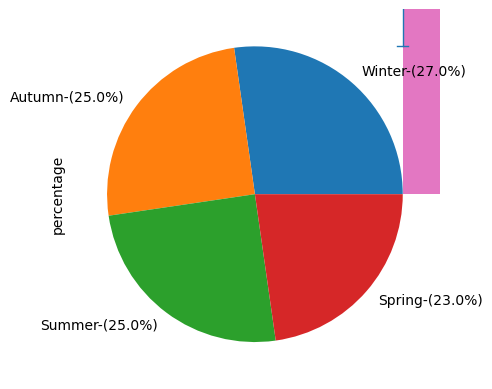

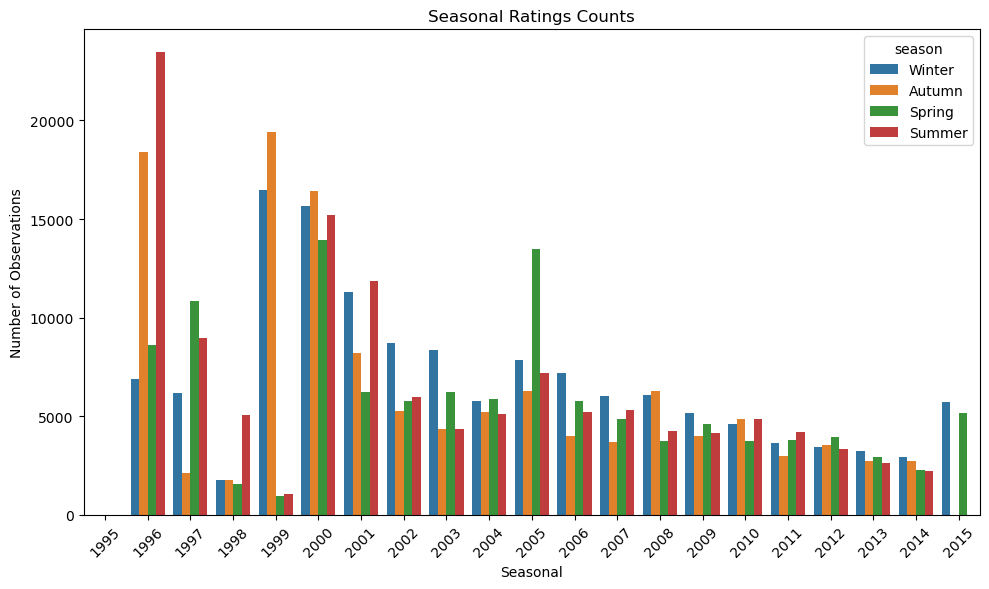

In [28]:


# monthly_counts['year'] = monthly_counts['timestamp'].dt.year-1990
seasonal_counts = ratings.groupby(["year", 'season', "month"]).size().reset_index(name='count')
print(seasonal_counts)
# Plotting the bar chart with seaborn
plt.figure(figsize=(10, 6))
sns.color_palette("hls", 8)
# barblot
sns.barplot(x='year', y='count', hue='season', data=seasonal_counts, errorbar=None)
# cat plot
# sns.catplot( data=seasonal_counts,x='year', y='count', hue='season',kind="bar")
# sns.displot(
#     seasonal_counts, x="count", col="year", hue="season"
#     binwidth=3, height=3, facet_kws=dict(margin_titles=True),
# )
plt.title('Seasonal Ratings Counts')
plt.xlabel('Seasonal')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

There appears to be a large amount of ratings in the 90s and generally is declining up until 2015. 

What is the distribution of ratings over the years?

What was the reason for the spike in Spring 2005? 

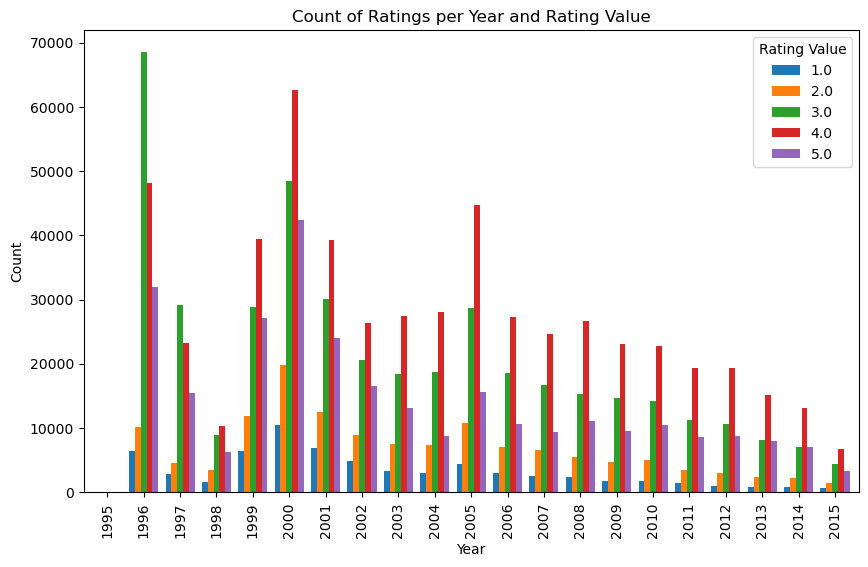

In [29]:
# Create a pivot table with the count of ratings per year and rating value
rating_counts = ratings.pivot_table(index='year', columns='rating', values='userId', aggfunc='count')

# Plot the results
rating_counts.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Count of Ratings per Year and Rating Value')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Rating Value')
plt.show()

This shows that the rating of 4 is predominantly used, followed by 3, and then 5. In general people are rating the movies highly. 

Next, I would like to see the ratings are different if the user has rated different amounts of movies

In [30]:
lower_rating_count_users = users_count_2[users_count_2["count"]<users_count_2['count'].quantile(0.25)]

IQR_rating_count_users = users_count_2[(users_count_2["count"]>users_count_2['count'].quantile(0.25)) & (users_count_2["count"]<users_count_2['count'].quantile(0.75))]

higher_rating_count_users = users_count_2[users_count_2["count"]>users_count_2['count'].quantile(0.75)]

rating_count_desc_1 = lower_rating_count_users["count"].describe()
rating_count_desc_2 = IQR_rating_count_users["count"].describe()
rating_count_desc_3 = higher_rating_count_users["count"].describe()

# Combine the results into a single table
combined_ratings_desc = pd.concat([rating_count_desc_1, rating_count_desc_2, rating_count_desc_3], axis=1)
combined_ratings_desc.columns = ['Lower Ratings', 'IQR ratings', "Higher ratings"]
print(combined_ratings_desc)



       Lower Ratings  IQR ratings  Higher ratings
count    3399.000000  6805.000000     3435.000000
mean       19.221242    59.475092      286.118486
std         5.385756    23.832217      220.566318
min         1.000000    29.000000      116.000000
25%        15.000000    39.000000      151.000000
50%        20.000000    54.000000      209.000000
75%        24.000000    77.000000      326.500000
max        27.000000   114.000000     2532.000000


there are an equal count of of users with a low, medium and high number of ratings

I will now look at the ratings distribution acorss time for each class of user by ratings count. 

First, i will look at lower rating users


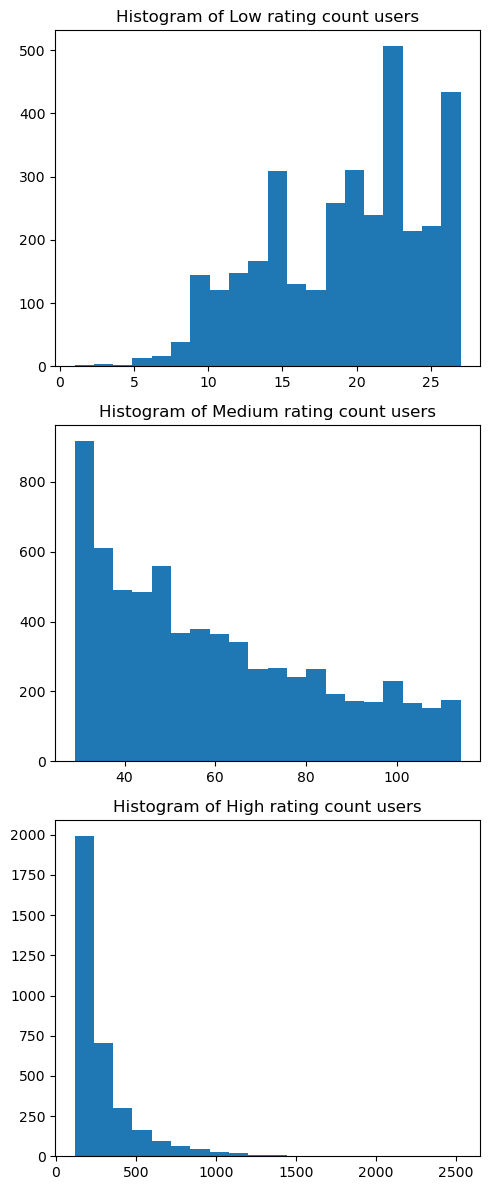

In [31]:
fig, axs = plt.subplots(3, 1, figsize=(5, 12))

# Plot for low rating count users
axs[0].hist(lower_rating_count_users['count'], bins=20, )
axs[0].set_title('Histogram of Low rating count users')

# Plot for medium rating count users
axs[1].hist(IQR_rating_count_users['count'], bins=20,)
axs[1].set_title('Histogram of Medium rating count users')

# Plot for high rating count users
axs[2].hist(higher_rating_count_users['count'], bins=20,)
axs[2].set_title('Histogram of High rating count users')

fig.tight_layout()

plt.show()

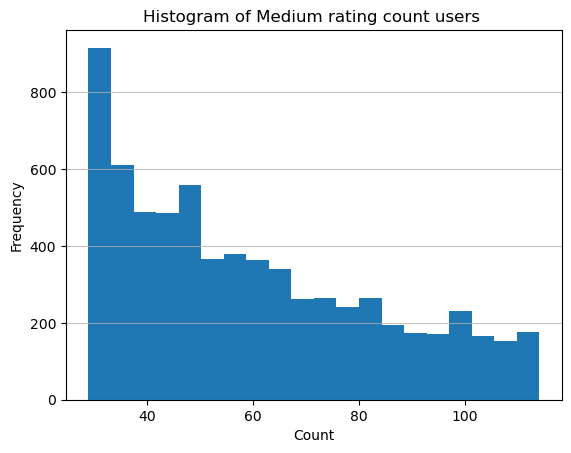

In [32]:
plt.hist(IQR_rating_count_users['count'], bins=20)
plt.title('Histogram of Medium rating count users ')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

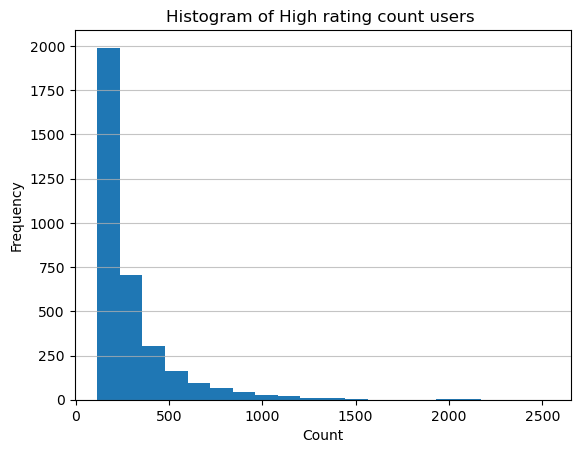

In [33]:
plt.hist(higher_rating_count_users['count'], bins=20)
plt.title('Histogram of High rating count users ')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

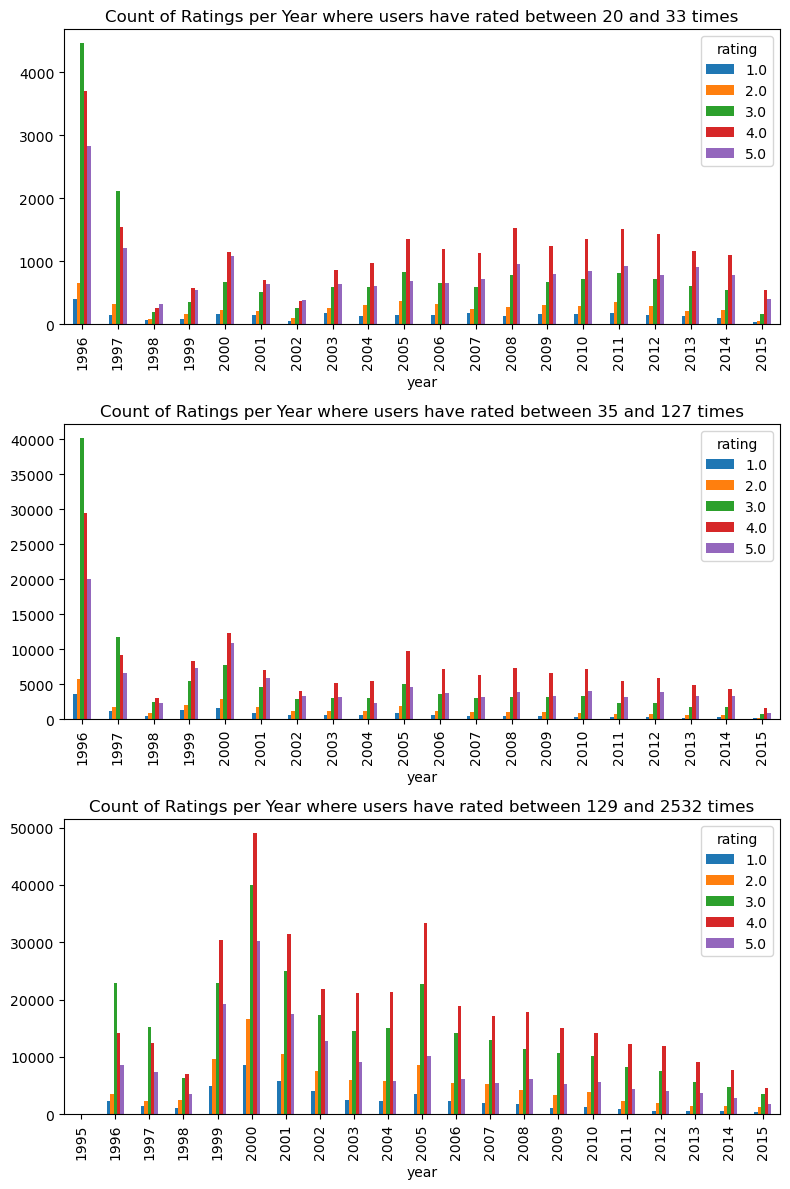

In [34]:
# createing dataframes based on quartiles
lower_users = ratings[ratings["userId"].isin(lower_rating_count_users["userId"])]
middle_users = ratings[ratings["userId"].isin(IQR_rating_count_users["userId"])]
upper_users = ratings[ratings["userId"].isin(higher_rating_count_users["userId"])]

# Create a figure with 3 subplots in a column
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Plot the first bar chart
lower_rating_counts = lower_users.pivot_table(index='year', columns='rating', values='userId', aggfunc='count')
lower_rating_counts.plot(kind='bar', ax=axs[0])
axs[0].set_title('Count of Ratings per Year where users have rated between 20 and 33 times')

# Plot the second bar chart
middle_rating_counts = middle_users.pivot_table(index='year', columns='rating', values='userId', aggfunc='count')
middle_rating_counts.plot(kind='bar', ax=axs[1])
axs[1].set_title('Count of Ratings per Year where users have rated between 35 and 127 times')

# Plot the third bar chart
upper_rating_counts = upper_users.pivot_table(index='year', columns='rating', values='userId', aggfunc='count')
upper_rating_counts.plot(kind='bar', ax=axs[2])
axs[2].set_title('Count of Ratings per Year where users have rated between 129 and 2532 times')

# Layout so plots do not overlap
fig.tight_layout()

plt.show()


Typically across all groups of users, rating 4 is the most common

year
1995       1
1996    2673
1997    1193
1998     370
1999     908
2000    1430
2001    1011
2002     736
2003     852
2004     881
2005    1225
2006    1001
2007     954
2008    1063
2009     977
2010    1015
2011     949
2012     898
2013     782
2014     715
2015     372
Name: userId, dtype: int64


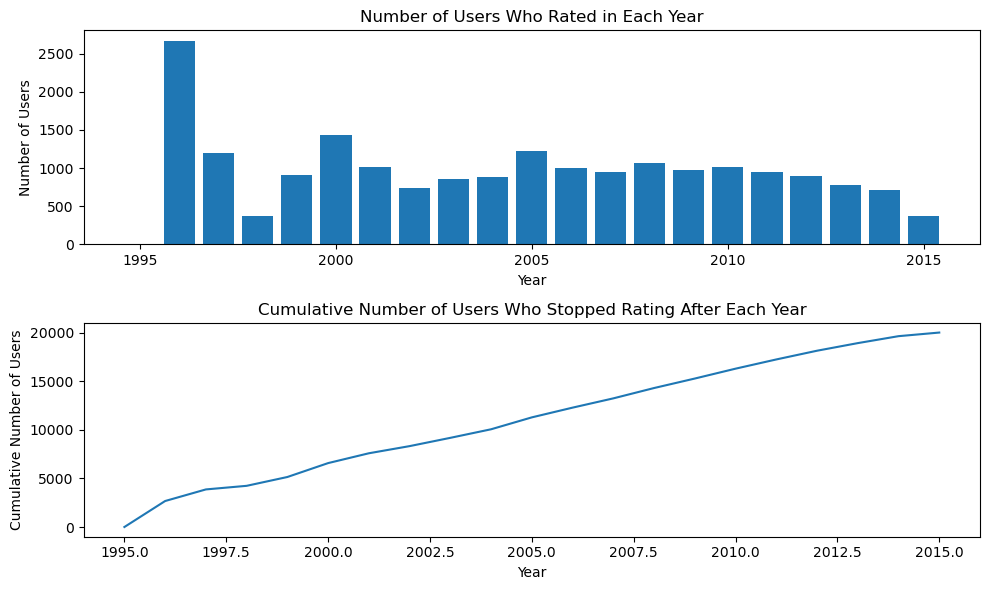

In [35]:
# Calculate the number of users who rated in each year
user_counts = ratings.groupby('year')['userId'].nunique()
print(user_counts)
# Calculate the cumulative number of users who stopped rating after each year
cumulative_stopped = user_counts.cumsum()

# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

# Plot the number of users who rated in each year
axs[0].bar(user_counts.index, user_counts.values)
axs[0].set_title('Number of Users Who Rated in Each Year')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Number of Users')

# Plot the cumulative number of users who stopped rating after each year
axs[1].plot(cumulative_stopped.index, cumulative_stopped.values)
axs[1].set_title('Cumulative Number of Users Who Stopped Rating After Each Year')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Cumulative Number of Users')

# Layout so plots do not overlap
fig.tight_layout()

plt.show()

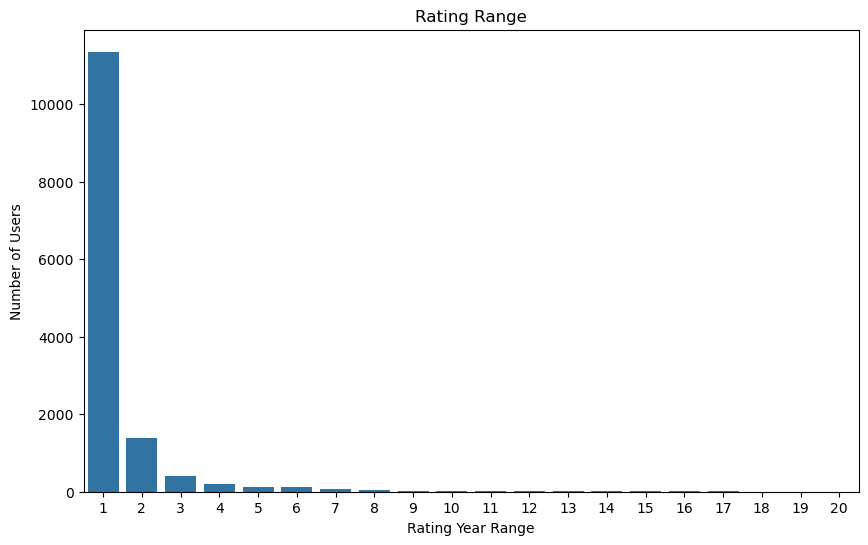

In [36]:
# Calculate the minimum and maximum years in the dataframe
min_year = ratings['year'].min()
max_year = ratings['year'].max()

# Create a table to store the results
user_rating_range = pd.DataFrame(index=range(1, max_year - min_year + 1), columns=['Users'])

# Loop through the users and count the number of years they rated
for index, row in user_rating_range.iterrows():
    year_range = index
    # print(ratings.groupby('userId')['year'].nunique())
    
    users = ratings.groupby('userId')['year'].nunique().eq(year_range).sum()
    user_rating_range.loc[index, 'Users'] = users

# Print the results
plt.figure(figsize=(10, 6))
sns.barplot(x=user_rating_range.index, y='Users',  data=user_rating_range, errorbar=None)
plt.title('Rating Range')
plt.xlabel('Rating Year Range')
plt.ylabel('Number of Users')
plt.show()
# print(user_rating_range)

In [37]:
ratings.to_csv('../samples/ratings_univariate_end_sample.csv', index=False)